# The Spark Foundation

## Data Science and Business Analytics Internship


### Task #1 : Prediction using Supervised ML

#### Author : Supriya Nagpal

#### Problem: Predict the percentage of a student based on the number of study hours. This is a Simple Linear Regression task as it involves 2 variables. What will be the predicted score if a student studies for 9.25 hrs/day?

#### Dataset : http://bit.ly/w-data

### 1. Import Required Libraries 

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error #RMSE (Root Mean Square Deviation)

### 2. Reading and Visualizing

In [2]:
#Location of Data required

path = r"https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
h_data = pd.read_csv(path)

In [3]:
h_data.info() #Information about Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
h_data.head() #Shows only first 5 rows of the data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
h_data.tail() ##Shows only last 5 rows of the data

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
h_data #Shows the full data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [7]:
h_data.describe() #Inform about important statistical terms depending on Data

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


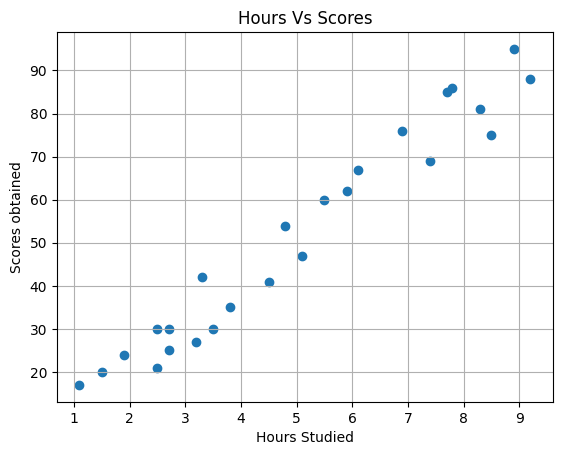

In [8]:
#Plot the Graph for Data

plt.scatter(x=h_data.Hours, y=h_data.Scores)
plt.xlabel("Hours Studied")
plt.ylabel("Scores obtained")
plt.title("Hours Vs Scores")
plt.grid()
plt.show()

The graph shows that there is a positive linear relation among the number of hours studied vs the scores obtained by the student. 

### 3. Cleaning Data

In [9]:
h_data.isnull().sum() #To check the missing values

Hours     0
Scores    0
dtype: int64

In [10]:
h_data.mean() #mean value

Hours      5.012
Scores    51.480
dtype: float64

In [11]:
h_data.info() #Infomation about Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### 4. Define Variable

In [12]:
x = h_data.drop("Scores", axis = "columns") #Drops specific column
y = h_data.drop("Hours", axis = "columns") #Drops specific columns

print("Shape of x", x.shape)
print("Shape of y", y.shape)

Shape of x (25, 1)
Shape of y (25, 1)


In [13]:
x = h_data['Hours']
y = h_data['Scores']

x = x.values.reshape(len(x), 1)
y = y.values.reshape(len(y), 1)

### 5. Train and Test Algorithm

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.35, random_state = 100)

In [15]:
x_train.shape #Gives number of rows and columns

(16, 1)

In [16]:
x_test.shape #Gives number of rows and columns

(9, 1)

In [17]:
y_train.shape #Gives number of rows and columns

(16, 1)

In [18]:
y_test.shape #Gives number of rows and columns

(9, 1)

### 6. Linear Regression (Model)

In [19]:
LR = LinearRegression() #Abbreviation for model

In [20]:
LR.fit(x_train, y_train) #Fitting model

LinearRegression()

In [21]:
LR.coef_ #Coefficient value

array([[10.04767782]])

In [22]:
LR.intercept_ #Intercepting value

array([0.88720685])

In [23]:
#Plot the regression line on the graph
# Line Formula : y = m * x +c

line = LR.coef_ * x_train + LR.intercept_

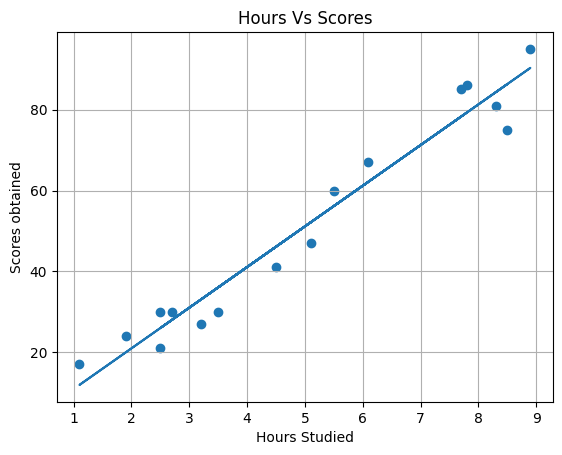

In [24]:
#Scatter Plot with regression line

plt.scatter(x_train, y_train)
plt.plot(x_train, line)
plt.xlabel("Hours Studied")
plt.ylabel("Scores obtained")
plt.title("Hours Vs Scores")
plt.grid()
plt.show()

### 7. Prediction

In [25]:
pre = LR.predict(x_test) #Prediction

In [26]:
pre #Show values

array([[28.01593698],
       [39.06838258],
       [34.04454367],
       [60.16850601],
       [15.95872359],
       [75.24002275],
       [70.21618384],
       [49.11606041],
       [93.32584283]])

In [27]:
list(zip(y_test, pre)) #List from Data

[(array([25], dtype=int64), array([28.01593698])),
 (array([35], dtype=int64), array([39.06838258])),
 (array([42], dtype=int64), array([34.04454367])),
 (array([62], dtype=int64), array([60.16850601])),
 (array([20], dtype=int64), array([15.95872359])),
 (array([69], dtype=int64), array([75.24002275])),
 (array([76], dtype=int64), array([70.21618384])),
 (array([54], dtype=int64), array([49.11606041])),
 (array([88], dtype=int64), array([93.32584283]))]

In [28]:
pd.DataFrame(np.c_[x_test, y_test, pre], columns = ["Hours", "Scores", "Scores_Predicted"])

,Hours,Scores,Scores_Predicted
0,2.7,25.0,28.015937
1,3.8,35.0,39.068383
2,3.3,42.0,34.044544
3,5.9,62.0,60.168506
4,1.5,20.0,15.958724
5,7.4,69.0,75.240023
6,6.9,76.0,70.216184
7,4.8,54.0,49.116060
8,9.2,88.0,93.325843


### 8. Tuning

In [29]:
LR.score(x_test, y_test) #Tells the accuracy of model 

0.9470651238166582

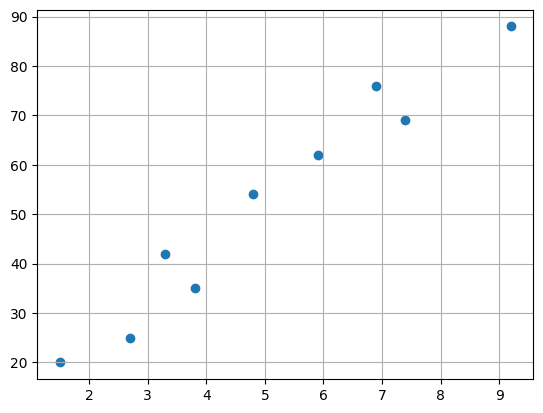

In [30]:
plt.scatter(x_test, y_test)
plt.grid()

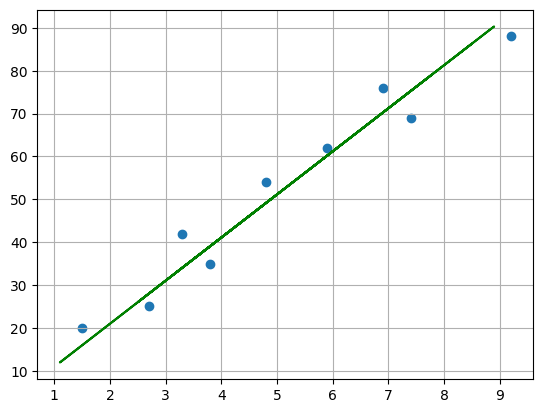

In [31]:
plt.scatter(x_test, y_test)
plt.plot(x_train, LR.predict(x_train), color = "green")
plt.grid()

### 9. Evaluation

In [32]:
mean_squared_error(y_test, pre, squared = True) #If True

25.914562718200436

In [33]:
mean_squared_error(y_test, pre, squared = False) #If False

5.09063480503173

### 10. Solution

In [34]:
Hours = [9.25]
Own_pre = LR.predict([Hours])

print("Number of Hours = {}".format([Hours]))
print("Predicted Scores = {}".format(Own_pre[0]))

Number of Hours = [[9.25]]
Predicted Scores = [93.82822672]


Hence, Predicted Scores = 93.82822672, while studing for 9.25 hours